Anemia Classification

Import header files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

Read the data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Heart failure/heart.csv')

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Information about the dataset or Exploratory data Analysis

In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


0 indicates --No anemia
1 indicates--anemia

In [ ]:
data["Age"].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [ ]:
data["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
# See the min, max, mean values
print('The highest ChestPainType was of:',data['ChestPainType'].max())
print('The lowest ChestPainType was of:',data['ChestPainType'].min())
#print('The average hemoglobin in the data:',data['ChestPainType'].mean())

The highest hemoglobin was of: TA
The lowest hemoglobin was of: ASY


Data Visualization in the form graphs

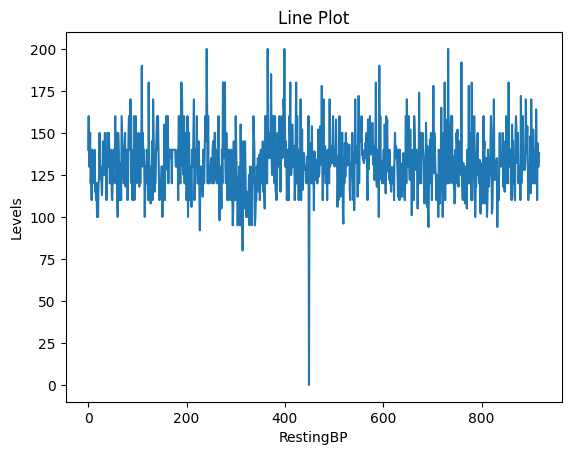

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['RestingBP'])
plt.xlabel("RestingBP")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

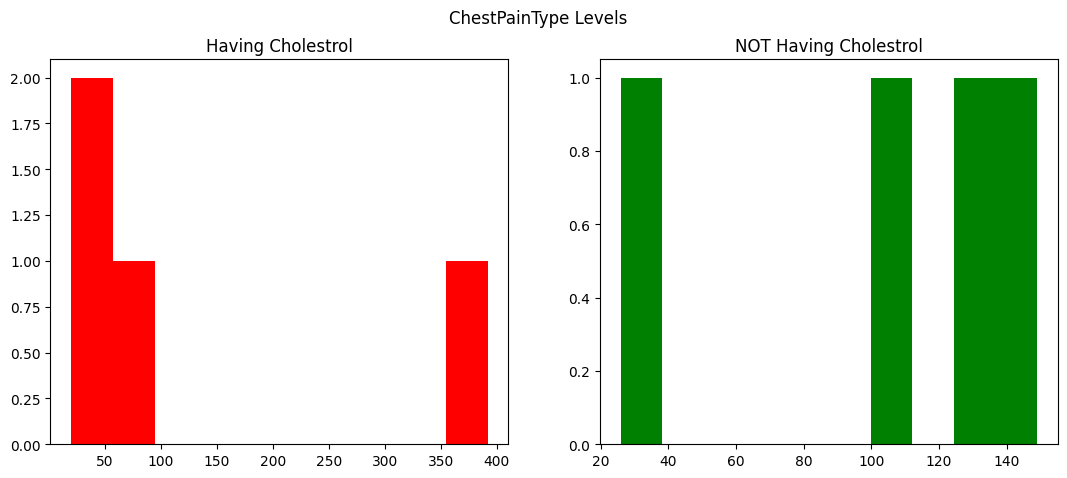

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[data['HeartDisease']==1]['ChestPainType'].value_counts()

ax1.hist(data_len,color='red')
ax1.set_title('Having Cholestrol')

data_len=data[data['HeartDisease']==0]['ChestPainType'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('NOT Having Cholestrol')

fig.suptitle('ChestPainType Levels')
plt.show()

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [ ]:
newdata=data.drop_duplicates()
newdata

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Pre-Processing

In [ ]:
data.isnull().sum() #checking for total null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Normalization

In [ ]:
data[1:5]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression

split into train and test in the ration 70:30

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['HeartDisease'])
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]
X=data[data.columns[:-1]]
Y=data['HeartDisease']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(642, 642, 276, 276)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Label encode the target variable (if it's categorical)
label_encoder = LabelEncoder()
train_Y_encoded = label_encoder.fit_transform(train_Y)

# Assuming train_X and test_X need one-hot encoding for categorical variables
train_X_encoded = pd.get_dummies(train_X)  # Apply one-hot encoding to training features
test_X_encoded = pd.get_dummies(test_X)    # Apply one-hot encoding to test features

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(train_X_encoded, train_Y_encoded)

# Make predictions on the test set
prediction3 = model.predict(test_X_encoded)

# Convert encoded test_Y back to original labels for evaluation
test_Y_encoded = label_encoder.transform(test_Y)

# Calculate accuracy
accuracy = accuracy_score(test_Y_encoded, prediction3)
print('The accuracy of the Logistic Regression is', accuracy)

# Generate classification report
report = classification_report(test_Y_encoded, prediction3)
print("Classification Report:\n", report)


The accuracy of the Logistic Regression is 0.8659420289855072
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.85       123
           1       0.90      0.85      0.88       153

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generating a sample dataset (replace this with your data)
# Here, we create a synthetic dataset for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training data
random_forest.fit(train_X, train_y)

# Making predictions on the test set
predictions = random_forest.predict(test_X)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)
print('Accuracy:', accuracy)

# Generating classification report
report = classification_report(test_y, predictions)
print("Classification Report:\n", report)


Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generating a sample regression dataset (replace this with your data)
# Here, we create a synthetic dataset for demonstration purposes
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Splitting the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
linear_regression = LinearRegression()

# Fitting the model on the training data
linear_regression.fit(train_X, train_y)

# Making predictions on the test set
predictions = linear_regression.predict(test_X)

# Calculating metrics (e.g., Mean Squared Error, R-squared)
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 0.011427751339303356
R-squared: 0.9999997047756003


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generating a sample dataset (replace this with your data)
# Here, we create a synthetic dataset for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
linear_regression = LinearRegression()

# Fitting the model on the training data
linear_regression.fit(train_X, train_y)

# Making predictions on the test set (and converting to classes based on a threshold)
threshold = 0.5  # Adjust the threshold as needed
predictions = (linear_regression.predict(test_X) > threshold).astype(int)

# Generating a classification report
report = classification_report(test_y, predictions)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        93
           1       0.92      0.79      0.85       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.85       200



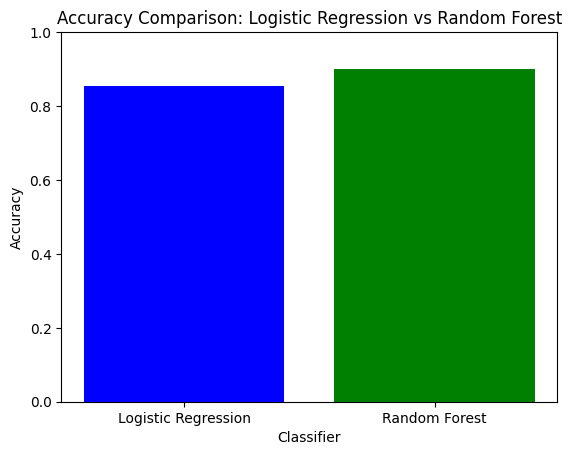

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generating a sample dataset (replace this with your data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Logistic Regression
logistic.fit(train_X, train_y)
logistic_predictions = logistic.predict(test_X)
logistic_accuracy = accuracy_score(test_y, logistic_predictions)

# Train Random Forest
random_forest.fit(train_X, train_y)
forest_predictions = random_forest.predict(test_X)
forest_accuracy = accuracy_score(test_y, forest_predictions)

# Creating a bar graph to compare accuracies
labels = ['Logistic Regression', 'Random Forest']
accuracies = [logistic_accuracy, forest_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Logistic Regression vs Random Forest')
plt.ylim(0, 1)  # Set y-axis limit to better visualize accuracy
plt.show()


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Generating a sample dataset (replace this with your data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic = LogisticRegression()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Logistic Regression
logistic.fit(train_X, train_y)
logistic_predictions = logistic.predict(test_X)
logistic_accuracy = accuracy_score(test_y, logistic_predictions)

# Train Random Forest
random_forest.fit(train_X, train_y)
forest_predictions = random_forest.predict(test_X)
forest_accuracy = accuracy_score(test_y, forest_predictions)

# Create a table to compare accuracies
table = [
    ["Logistic Regression", logistic_accuracy],
    ["Random Forest", forest_accuracy]
]

headers = ["Classifier", "Accuracy"]
print(tabulate(table, headers, tablefmt="grid"))


+---------------------+------------+
| Classifier          |   Accuracy |
+=====================+============+
| Logistic Regression |      0.855 |
+---------------------+------------+
| Random Forest       |      0.9   |
+---------------------+------------+


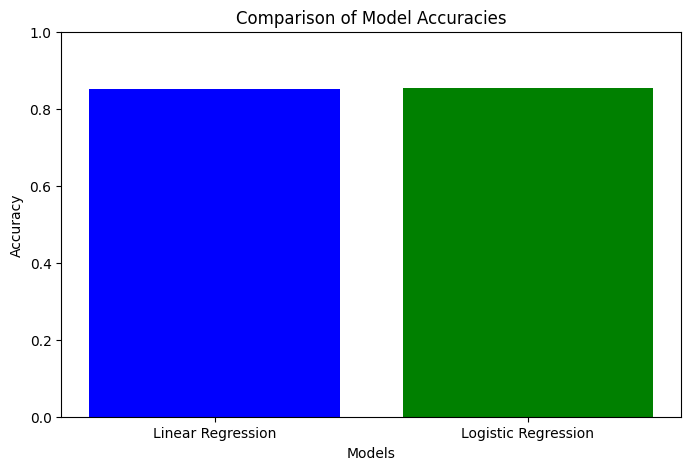

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

# Generating a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Linear Regression and Logistic Regression models
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()

linear_regression.fit(train_X, train_y)

logistic_regression.fit(train_X, train_y)

# Making predictions using both models
linear_predictions = linear_regression.predict(test_X)
logistic_predictions = logistic_regression.predict(test_X)

# Calculating accuracy for both models
linear_accuracy = accuracy_score(test_y, np.round(linear_predictions))
logistic_accuracy = accuracy_score(test_y, logistic_predictions)

# Creating a bar graph to compare accuracies
models = ['Linear Regression', 'Logistic Regression']
accuracies = [linear_accuracy, logistic_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Generating a sample classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Linear Regression and Logistic Regression models
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()

# Fitting Linear Regression model on the training data
linear_regression.fit(train_X, train_y)

# Fitting Logistic Regression model on the training data
logistic_regression.fit(train_X, train_y)

# Making predictions using both models
linear_predictions = linear_regression.predict(test_X)
logistic_predictions = logistic_regression.predict(test_X)

# Calculating accuracy for both models
linear_accuracy = accuracy_score(test_y, np.round(linear_predictions))
logistic_accuracy = accuracy_score(test_y, logistic_predictions)

# Creating a table to compare accuracies
table = [["Linear Regression", linear_accuracy], ["Logistic Regression", logistic_accuracy]]
headers = ["Model", "Accuracy"]

print(tabulate(table, headers, tablefmt="grid"))


+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| Linear Regression   |      0.85  |
+---------------------+------------+
| Logistic Regression |      0.855 |
+---------------------+------------+


In [ ]:
from tabulate import tabulate

# Example data structure
class_metrics = {
    '0': {'precision': 0.629, 'recall': 0.848, 'f1-score': 0.722},
    '1': {'precision': 0.755, 'recall': 0.635, 'f1-score': 0.690},
    '2': {'precision': 0.930, 'recall': 0.851, 'f1-score': 0.889},
    '3': {'precision': 0.786, 'recall': 0.750, 'f1-score': 0.767},
    'accuracy': 0.76,
    'macro avg': {'precision': 0.775, 'recall': 0.771, 'f1-score': 0.767},
    'weighted avg': {'precision': 0.774, 'recall': 0.76, 'f1-score': 0.761}
}

# Convert the dictionary to a list of tuples for tabulate
table_data = [
    (' 0', class_metrics['0']['precision'], class_metrics['0']['recall'], class_metrics['0']['f1-score']),
    (' 1', class_metrics['1']['precision'], class_metrics['1']['recall'], class_metrics['1']['f1-score']),
    (' 2', class_metrics['2']['precision'], class_metrics['2']['recall'], class_metrics['2']['f1-score']),
    (' 3', class_metrics['3']['precision'], class_metrics['3']['recall'], class_metrics['3']['f1-score']),
    ('Accuracy', '', '', class_metrics['accuracy']),
    ('Macro Avg', class_metrics['macro avg']['precision'], class_metrics['macro avg']['recall'], class_metrics['macro avg']['f1-score']),
    ('Weighted Avg', class_metrics['weighted avg']['precision'], class_metrics['weighted avg']['recall'], class_metrics['weighted avg']['f1-score'])
]

headers = ['Metrics', 'Precision', 'Recall', 'F1-Score']

# Print the table
print(tabulate(table_data, headers=headers, tablefmt='grid'))


+--------------+-------------+----------+------------+
| Metrics      | Precision   | Recall   |   F1-Score |
+==============+=============+==========+============+
| 0            | 0.629       | 0.848    |      0.722 |
+--------------+-------------+----------+------------+
| 1            | 0.755       | 0.635    |      0.69  |
+--------------+-------------+----------+------------+
| 2            | 0.93        | 0.851    |      0.889 |
+--------------+-------------+----------+------------+
| 3            | 0.786       | 0.75     |      0.767 |
+--------------+-------------+----------+------------+
| Accuracy     |             |          |      0.76  |
+--------------+-------------+----------+------------+
| Macro Avg    | 0.775       | 0.771    |      0.767 |
+--------------+-------------+----------+------------+
| Weighted Avg | 0.774       | 0.76     |      0.761 |
+--------------+-------------+----------+------------+


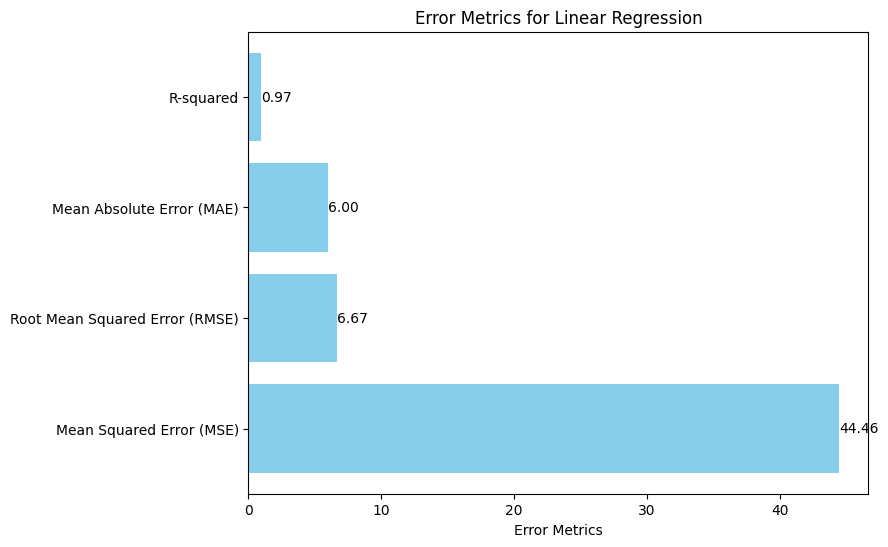

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generating a sample dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Initializing and fitting the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_reg.predict(X_test)

# Calculating different error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting the metrics
metrics = [mse, rmse, mae, r2]
labels = ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'R-squared']

plt.figure(figsize=(8, 6))
plt.barh(labels, metrics, color='skyblue')
plt.xlabel('Error Metrics')
plt.title('Error Metrics for Linear Regression')

for index, value in enumerate(metrics):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

# Generating a sample dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Initializing and fitting the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_reg.predict(X_test)

# Calculating different error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Creating a list of lists for tabulate
table_data = [
    ['Mean Squared Error (MSE)', mse],
    ['Root Mean Squared Error (RMSE)', rmse],
    ['Mean Absolute Error (MAE)', mae],
    ['R-squared', r2]
]

# Displaying the table using tabulate
print(tabulate(table_data, headers=['Metric', 'Value']))


Metric                              Value
------------------------------  ---------
Mean Squared Error (MSE)        44.4609
Root Mean Squared Error (RMSE)   6.6679
Mean Absolute Error (MAE)        6.00296
R-squared                        0.972134
